In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sys
sys.path.append("../scripts")
from data import Data
from NN_models import RNN
from scipy.stats import kurtosis, skew
import matplotlib

In [3]:
data_btc = Data("BTC")
data_btc.load_data(pump_thresold=0.01)
data_btc.df.index = pd.to_datetime(data_btc.df['date'])

data_eth = Data("ETH")
data_eth.load_data(pump_thresold=0.01)
data_eth.df.index = pd.to_datetime(data_eth.df['date'])

data_eos = Data("EOS")
data_eos.load_data(pump_thresold=0.01)
data_eos.df.index = pd.to_datetime(data_eos.df['date'])

/Users/guillaume/MyProjects/PythonProjects/ProgrammingProject/ADA/venv/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/guillaume/MyProjects/PythonProjects/ProgrammingProject/ADA/venv/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/guillaume/MyProjects/PythonProjects/ProgrammingProject/ADA/venv/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated functi

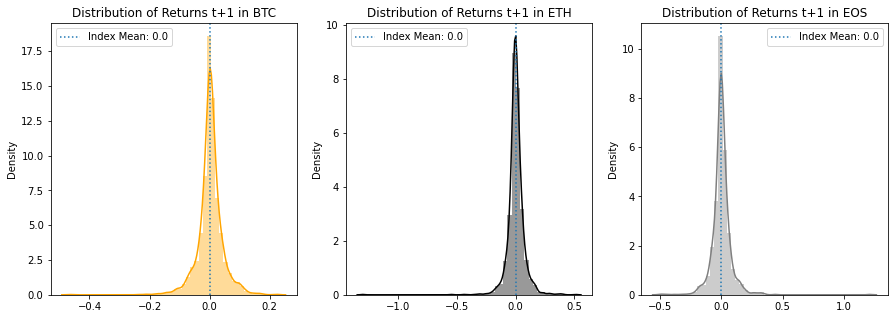

In [4]:
plt.figure(figsize=(15,5))

plt.subplot(131)
return_btc = data_btc.df['Close_ret_t+1'].dropna().values
sns.distplot(return_btc,color='orange')
mean_return = return_btc.mean()
plt.title('Distribution of Returns t+1 in BTC')
plt.axvline(mean_return, ls=':', label='Index Mean: {}'.format(round(mean_return, 2)))
plt.legend()

plt.subplot(132)
return_eth = data_eth.df['Close_ret_t+1'].dropna().values
sns.distplot(return_eth,color='black')
mean_return = return_eth.mean()
plt.title('Distribution of Returns t+1 in ETH')
plt.axvline(mean_return, ls=':', label='Index Mean: {}'.format(round(mean_return, 2)))
plt.legend()

plt.subplot(133)
data_eos.df = data_eos.df.dropna()
return_eos = data_eos.df['Close_ret_t+1'].values
sns.distplot(return_eos,color='gray')
mean_return = return_eos.mean()
plt.title('Distribution of Returns t+1 in EOS')
plt.axvline(mean_return, ls=':', label='Index Mean: {}'.format(round(mean_return, 2)))
plt.legend()

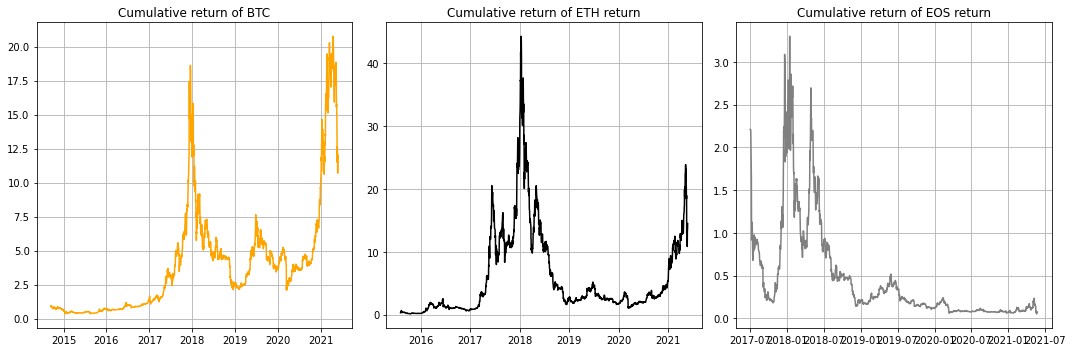

In [5]:
plt.figure(figsize=(15,5))

plt.subplot(131)
plt.plot((data_btc.df['Close_ret_t+1']+1).cumprod(),color="orange")
plt.grid(True)
plt.title("Cumulative return of BTC")
plt.tight_layout()

plt.subplot(132)
plt.plot(-(data_eth.df['Close_ret_t+1']+1).cumprod(),color="black")
plt.title("Cumulative return of ETH return")
plt.grid(True)
plt.tight_layout()

plt.subplot(133)
plt.plot((data_eos.df['Close_ret_t+1']+1).cumprod(),color="gray")
plt.title("Cumulative return of EOS return")
plt.gca().xaxis.set_major_locator(matplotlib.dates.YearLocator())
plt.gca().xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%Y'))
plt.grid(True)
plt.tight_layout()

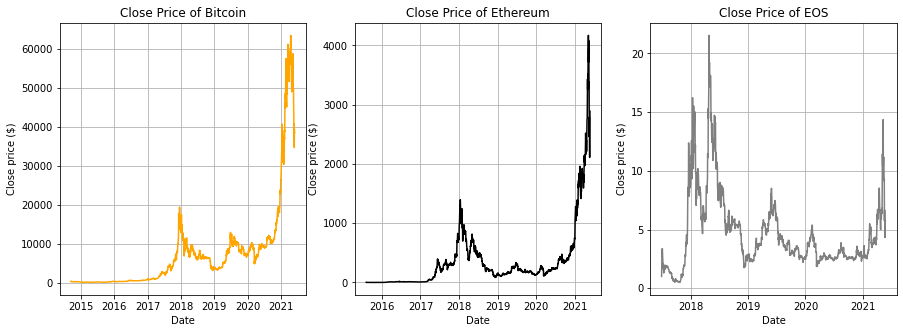

In [20]:
plt.figure(figsize=(15,5))

plt.subplot(131)
plt.plot(data_btc.df['Close'],color="orange")
plt.title("Close Price of Bitcoin")
plt.xlabel('Date')
plt.ylabel("Close price ($)")
plt.grid(True)

plt.subplot(132)
plt.plot(data_eth.df['Close'],color="black")
plt.title("Close Price of Ethereum")
plt.xlabel('Date')
plt.ylabel("Close price ($)")
plt.grid(True)

plt.subplot(133)
plt.plot(data_eos.df['Close'],color="gray")
plt.title("Close Price of EOS")
plt.xlabel('Date')
plt.ylabel("Close price ($)")
plt.gca().xaxis.set_major_locator(matplotlib.dates.YearLocator())
plt.gca().xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%Y'))
plt.grid(True)

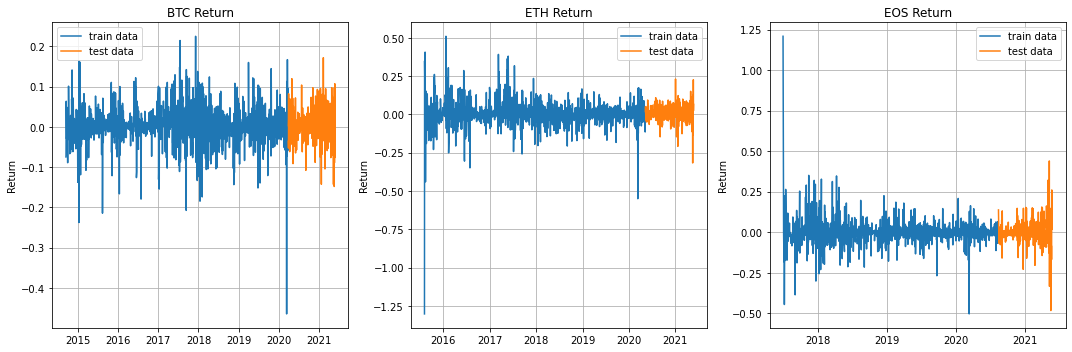

In [19]:
import matplotlib
X = data_btc.df['Close_ret_t+1']
pct_split = 0.2
split = int((1-pct_split)*len(X))
X_train, X_test = X[:split],X[split:]

plt.figure(figsize=(15,5))

plt.subplot(131)
plt.plot(X_train, label='train data')
plt.plot(X_test,label='test data')
plt.grid(True)
plt.legend()
plt.ylabel('Return')
plt.title("BTC Return")

X = data_eth.df['Close_ret_t+1']
pct_split = 0.2
split = int((1-pct_split)*len(X))
X_train, X_test = X[:split],X[split:]
plt.subplot(132)
plt.plot(X_train, label='train data')
plt.plot(X_test,label='test data')
plt.grid(True)
plt.legend()
plt.ylabel('Return')
plt.title("ETH Return")

X = data_eos.df['Close_ret_t+1']
pct_split = 0.2
split = int((1-pct_split)*len(X))
X_train, X_test = X[:split],X[split:]
plt.subplot(133)
plt.plot(X_train, label='train data')
plt.plot(X_test,label='test data')
plt.grid(True)
plt.legend()
plt.ylabel('Return')
plt.gca().xaxis.set_major_locator(matplotlib.dates.YearLocator())
plt.gca().xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%Y'))
plt.title("EOS Return")

plt.tight_layout()

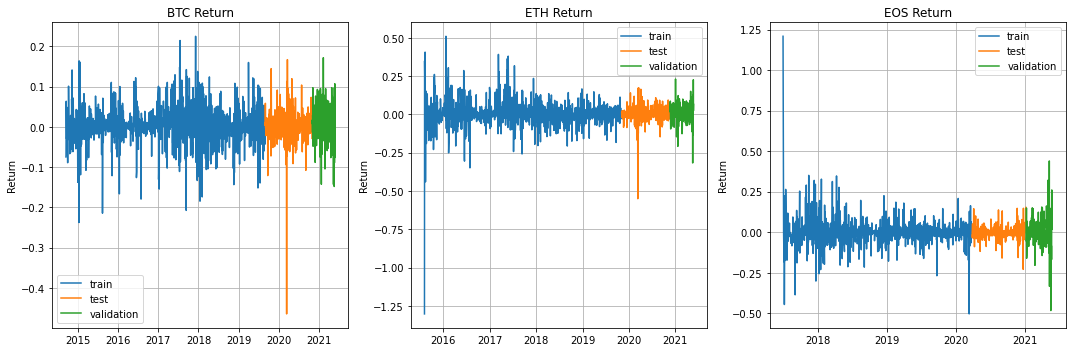

In [32]:

plt.figure(figsize=(15,5))

plt.subplot(131)
X = data_btc.df['Close_ret_t+1']
ind = np.arange(0, X.shape[0], 1)
tr = int(np.ceil(len(ind) * 0.7))
te = int(np.ceil(len(ind) * 0.9))
X_tr = X[:tr]
X_te = X[tr:te]
X_va = X[te:]

plt.plot(X_tr,label='train')
plt.plot(X_te,label='test')
plt.plot(X_va,label='validation')
plt.legend()
plt.grid(True)
plt.ylabel('Return')
plt.title("BTC Return")

plt.subplot(132)
X = data_eth.df['Close_ret_t+1']
ind = np.arange(0, X.shape[0], 1)
tr = int(np.ceil(len(ind) * 0.7))
te = int(np.ceil(len(ind) * 0.9))
X_tr = X[:tr]
X_te = X[tr:te]
X_va = X[te:]

plt.plot(X_tr,label='train')
plt.plot(X_te,label='test')
plt.plot(X_va,label='validation')
plt.legend()
plt.grid(True)
plt.ylabel('Return')
plt.title("ETH Return")

plt.subplot(133)
X = data_eos.df['Close_ret_t+1']
ind = np.arange(0, X.shape[0], 1)
tr = int(np.ceil(len(ind) * 0.7))
te = int(np.ceil(len(ind) * 0.9))
X_tr = X[:tr]
X_te = X[tr:te]
X_va = X[te:]

plt.plot(X_tr,label='train')
plt.plot(X_te,label='test')
plt.plot(X_va,label='validation')
plt.legend()
plt.grid(True)
plt.ylabel('Return')
plt.gca().xaxis.set_major_locator(matplotlib.dates.YearLocator())
plt.gca().xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%Y'))
plt.title("EOS Return")
plt.tight_layout()